In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/blogs.csv')

# Display the first few rows and check for missing values
print(data.head())
print(data.isnull().sum())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Data      0
Labels    0
dtype: int64


Exploratory Data Analysis (EDA)

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


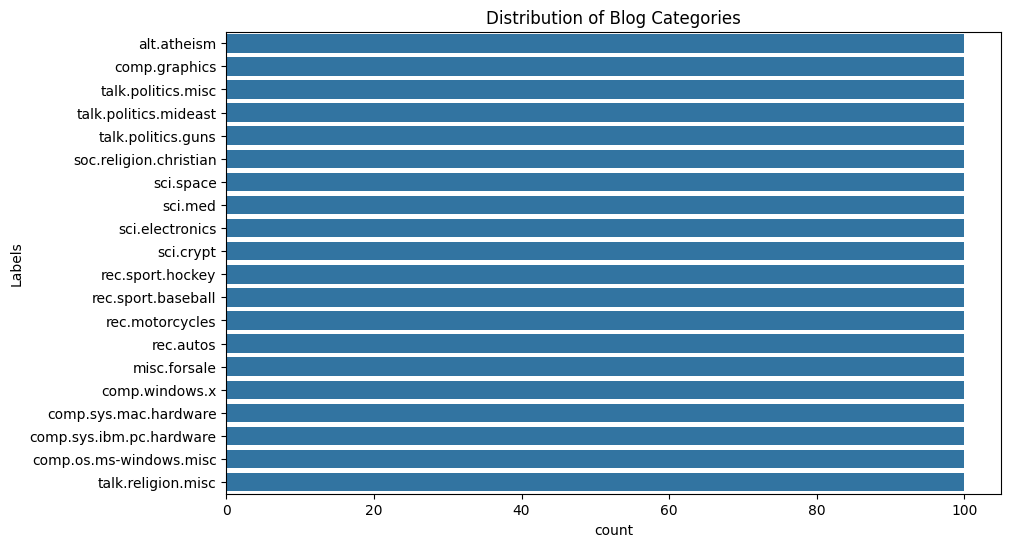

In [2]:
# Check the distribution of categories
category_counts = data['Labels'].value_counts()
print(category_counts)

# Visualize the category distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='Labels', data=data, order=category_counts.index)
plt.title('Distribution of Blog Categories')
plt.show()


Data Preprocessing

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the Data column
data['cleaned_text'] = data['Data'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 2.Feature Extraction

In [4]:
 from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['Labels']


3. Train Naive Bayes Model for Text Classification

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8225
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.73      0.76      0.75        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88   

4. Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


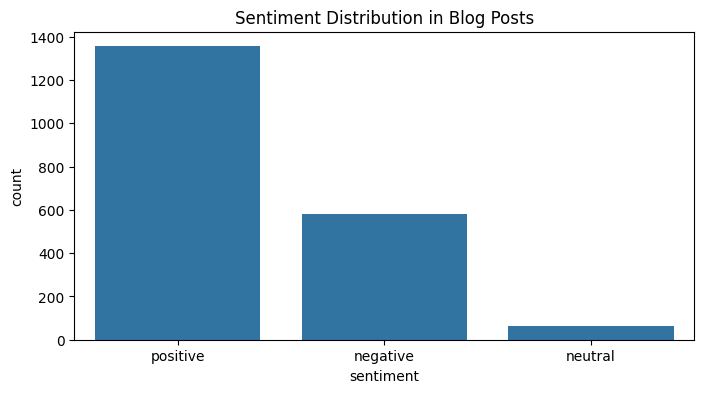

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

# View sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment', data=data, order=sentiment_counts.index)
plt.title('Sentiment Distribution in Blog Posts')
plt.show()


Step-by-Step Implementation
1. Import Required Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset (if not already loaded)
data = pd.read_csv('/content/blogs.csv')

# Assuming you've already preprocessed the text
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf.fit_transform(data).toarray()
y = data['Labels']


In [19]:
# Create and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.8225

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.83      0.64        18
           comp.graphics       0.83      0.83      0.83        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.73      0.76      0.75        25
   comp.sys.mac.hardware       0.82      0.86      0.84        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('/content/blogs.csv')

# Preprocess the data (this should already be done)
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')

    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['cleaned_text'] = data['Data'].apply(preprocess_text)

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['Labels']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading packa

Accuracy: 0.815

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.77      0.85      0.81        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.79      0.75      0.77        20
                 sci.med       0.9

In [23]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the Data column
data['sentiment'] = data['Data'].apply(get_sentiment)


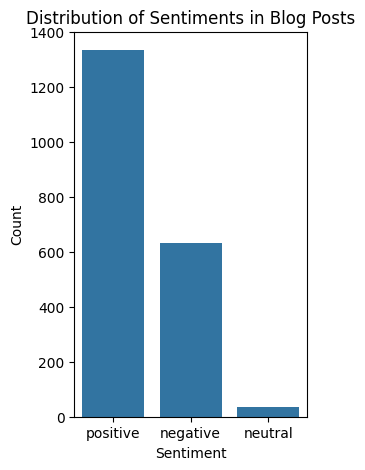

In [26]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Visualize the sentiment distribution
plt.figure(figsize=(3,5))
sns.countplot(x='sentiment', data=data, order=sentiment_counts.index)
plt.title('Distribution of Sentiments in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


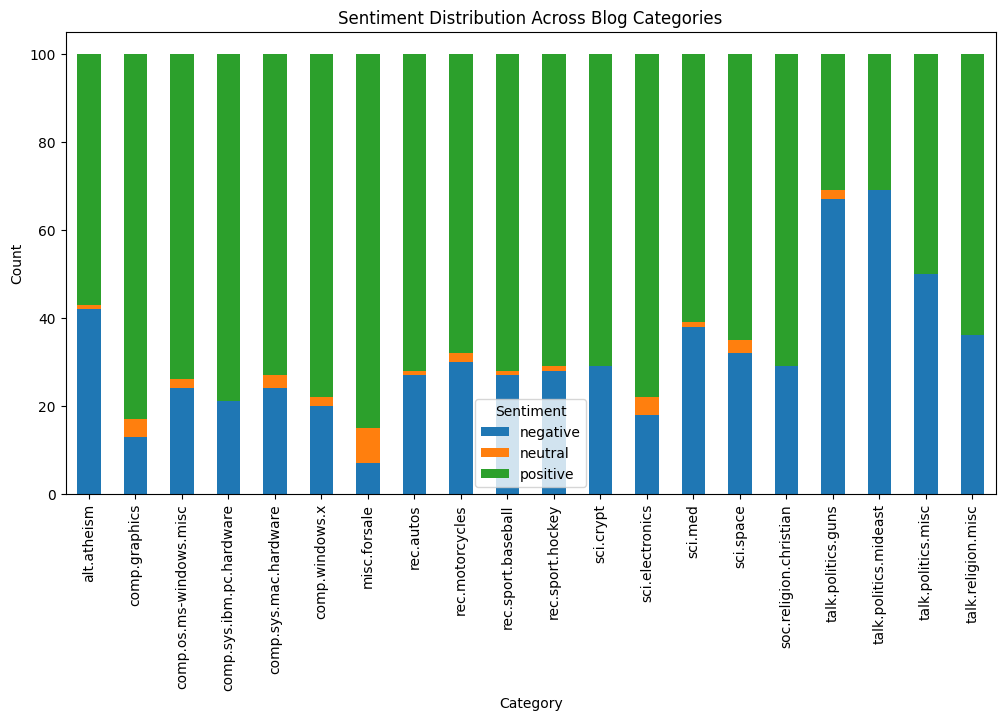

In [27]:
# Group by category and sentiment
category_sentiment_counts = data.groupby(['Labels', 'sentiment']).size().unstack()

# Visualize sentiment distribution across categories
category_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


In [28]:
# Display the sentiment counts for the overall dataset
print("Overall Sentiment Distribution:")
print(sentiment_counts)

# Display sentiment counts by category
print("\nSentiment Distribution by Category:")
print(category_sentiment_counts)


Overall Sentiment Distribution:
sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64

Sentiment Distribution by Category:
sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   42.0      1.0      57.0
comp.graphics                 13.0      4.0      83.0
comp.os.ms-windows.misc       24.0      2.0      74.0
comp.sys.ibm.pc.hardware      21.0      NaN      79.0
comp.sys.mac.hardware         24.0      3.0      73.0
comp.windows.x                20.0      2.0      78.0
misc.forsale                   7.0      8.0      85.0
rec.autos                     27.0      1.0      72.0
rec.motorcycles               30.0      2.0      68.0
rec.sport.baseball            27.0      1.0      72.0
rec.sport.hockey              28.0      1.0      71.0
sci.crypt                     29.0      NaN      71.0
sci.electronics               18.0      4.0      78.0
sci.med                       38.0

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test and y_pred are defined
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.815

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.77      0.85      0.81        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.54      0.70      0.61        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.85      0.85      0.85        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.90      0.95      0.93        20
         sci.electronics       0.79      0.75      0.77        20
                 sci.med       0.9

2. Metrics Interpretation
Accuracy: This metric indicates the overall correctness of the model. A high accuracy suggests that the model is correctly classifying a majority of the instances.

Precision: This metric shows how many of the predicted positive classes are actually positive. High precision indicates that the model has a low false positive rate.

Recall: This metric reveals how many of the actual positive classes were predicted correctly. High recall means the model has a low false negative rate.

F1-Score: This is the harmonic mean of precision and recall, providing a balance between the two. It’s particularly useful when the class distribution is imbalanced.